<a href="https://colab.research.google.com/github/Bhupsh/A1/blob/main/upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [6]:
import math
observations = 10000
machines = 10
numbers_of_selections_of_each_machine = [0] * machines
sums_of_rewards_for_each_machine = [0] * machines
machines_selected = []
total_rewards = 0

for n in range(observations):
    bandit = 0
    max_upper_bound = 0
    
    for i in range(machines):
        if (numbers_of_selections_of_each_machine[i] > 0):        
            average_reward = sums_of_rewards_for_each_machine[i] / numbers_of_selections_of_each_machine[i]           
            di = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections_of_each_machine[i])           
            upper_bound = average_reward + di
            
        else:
            upper_bound = 1e400
            
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            bandit = i
   
    machines_selected.append(bandit) 
    numbers_of_selections_of_each_machine[bandit] = numbers_of_selections_of_each_machine[bandit] + 1
    reward = dataset.values[n, bandit]
    sums_of_rewards_for_each_machine[bandit] = sums_of_rewards_for_each_machine[bandit] + reward
    total_rewards = total_rewards + reward

## Visualising the results

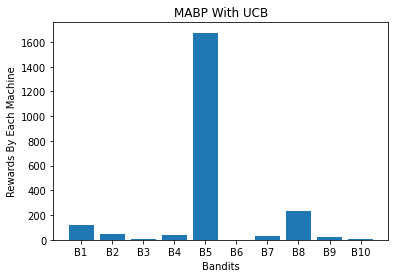

In [11]:
plt.bar(['B1','B2','B3','B4','B5','B6','B7','B8','B9','B10'],sums_of_rewards_for_each_machine)
plt.title('MABP With UCB')
plt.xlabel('Bandits')
plt.ylabel('Rewards By Each Machine')
plt.show()



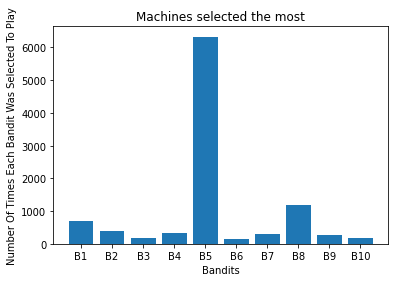

In [9]:
#Visualizing the selections of each machine
plt.bar(['B1','B2','B3','B4','B5','B6','B7','B8','B9','B10'],numbers_of_selections_of_each_machine)
plt.title('Machines selected the most')
plt.xlabel('Bandits')
plt.ylabel('Number Of Times Each Bandit Was Selected To Play')
plt.show()